In [1]:
import pandas as pd
import numpy as np

In [2]:
def first(df, cols = None, n = 6, include=None, keep_na=True):
    if cols is None:
        cols = df.columns
    if include is None:
        include = {}
    df2 = df[cols].copy()
    for col in cols:
        df2[col + '2'] = 'OTRO'
        first = df2[col].value_counts().index[:n].tolist()
        if col in list(include.keys()):
            first.extend(include[col])
        if keep_na:
            first.append(np.nan)
        df2[col + '2'][df2[col].isin(first)] = df2[col]
    df2.drop(cols, axis = 1, inplace = True)
    return df2

def n_values(df, cols = None, n = 6):
    if cols is None:
        cols = df.columns
    N_cols = ['N_' + col for col in cols]
    cols2 = np.asarray([cols, N_cols]).ravel(order = 'F')
    df_tmp = pd.DataFrame(columns = cols)
    for col in cols:
        firstn = df[col].value_counts().iloc[:n]
        firstn_index = firstn.index.tolist()
        firstn_N = firstn.values.tolist()
        for i in range(n - len(firstn)):
            firstn_index.append('')
            firstn_N.append(0)
        df_tmp[col] = ['{} ({:,})'.format(x, y) for x, y in zip(firstn_index, firstn_N)]# firstn_index.astype(str) + firstn_N.astype(str)
        df_tmp = df_tmp.applymap(str)
        df_tmp = df_tmp.applymap(lambda x: x.replace('(0)', ''))
        df_tmp.index = ['V' + str(x) for x in range(1, n + 1)]
    return df_tmp.T

def descrip_colmuns(df, cols = None, n_vals = 6, summary = True):
    if cols is None:
        cols = df.columns
    df2 = df[cols].copy()
    dc = df2.dtypes.to_frame()
    dc.columns = ['dtype']
    dc['dtype'] = dc['dtype'].astype(str)
    dc['Tipo'] = ''
    dc['Tipo'][dc['dtype'] == 'object'] = 'Categoria'
    dc['Tipo'][[x.startswith(('int', 'float')) for x in dc['dtype']]] = 'Numero'
    n_nulls = df2.isnull().sum()#.to_frame('N_Nulls')
    n_nulls_porc = n_nulls / float(len(df2))
    a = pd.Series(['{} ({:.1%})'.format(x, y) for x, y in zip(n_nulls, n_nulls_porc)], index = df2.columns, name = 'N_Nulls')
    dc = dc.join(a)
    dc = dc.join(df2.nunique().to_frame('N_Unicos'))
    if n_vals > 0:
        dc = dc.join(n_values(df2, cols, n_vals))
    if summary:
        dc = dc.join(df2.describe().T)
    dc.fillna('', inplace = True)
    return dc

def cols_tipos(df, exclude = [], cols_ord = [], Print = True):
    # Tipo de variable
    cols = [x for x in df.columns if x not in exclude]
    cols_cat = [x for x in list(df.select_dtypes(include=['object','category'])) if x not in exclude]
    cols_num = [x for x in list(df.select_dtypes(include=['integer','floating'])) if x not in exclude]
    cols_otros = [x for x in cols if x not in cols_cat and x not in cols_num]

    # Categorías nominales y ordinales
    cols_nom = [x for x in cols_cat if x not in cols_ord]

    if Print:
        print('Categóricas:\n', cols_cat)
        print('\nCategóricas Ordinal:\n', cols_ord)
        print('\nCategóricas Nominal:\n', cols_nom)
        print('\nNuméricas:\n', cols_num)
        print('\nOtros:\n', cols_otros)
        print('\nExcluidos:\n', exclude)
    
    return cols, cols_cat, cols_num, cols_nom

In [123]:
path = 'D:/OneDrive - Rimac  Seguros y Reaseguros/Documents/1. Proyectos/Hackaton/02. 20170914 Google Analytics/'

data = pd.read_csv(path + 'data.csv', encoding='latin1', na_values=['(not set)'])
data

,screenResolution,userGender,userAgeBracket,language,bounceRate,avgSessionDuration,avgTimeOnPage,sessions,ID,year,dayOfWeek,deviceCategory,pagePath,minute,browserSize,city,region,country
0,720x1280,male,45-54,es-us,86.666667,69.533333,1043.000000,45.0,720x1280male45-54,2017,NaN,mobile,NaN,NaN,NaN,NaN,NaN,Peru
1,720x1280,male,35-44,es-us,76.623377,125.285714,83.086207,77.0,720x1280male35-44,2017,NaN,mobile,NaN,NaN,NaN,NaN,NaN,Peru
2,720x1280,male,25-34,es-us,75.942029,38.568116,70.786096,345.0,720x1280male25-34,2017,NaN,mobile,NaN,NaN,NaN,NaN,NaN,Peru
3,720x1280,male,18-24,es-us,82.857143,48.635714,166.073171,140.0,720x1280male18-24,2017,NaN,mobile,NaN,NaN,NaN,NaN,NaN,Peru
4,720x1280,female,25-34,es-us,47.058824,247.372549,74.650888,51.0,720x1280female25-34,2017,NaN,mobile,NaN,NaN,NaN,NaN,NaN,Peru
5,720x1184,male,25-34,es-pe,77.777778,7.166667,16.695652,54.0,720x1184male25-34,2017,NaN,mobile,NaN,NaN,NaN,NaN,NaN,Peru
6,640x360,male,65+,es-419,73.846154,44.892308,107.962963,65.0,640x360male65+,2017,NaN,mobile,NaN,NaN,NaN,NaN,NaN,Peru
7,640x360,male,55-64,es-419,63.366337,95.410891,65.301695,202.0,640x360male55-64,2017,NaN,mobile,NaN,NaN,NaN,NaN,NaN,Peru
8,640x360,male,45-54,es-419,70.616114,68.573460,88.298780,211.0,640x360male45-54,2017,NaN,mobile,NaN,NaN,NaN,NaN,NaN,Peru
9,640x360,male,35-44,es-419,70.557491,71.811847,88.767241,574.0,640x360male35-44,2017,NaN,mobile,NaN,NaN,NaN,NaN,NaN,Peru


In [124]:
descrip_colmuns(data)

,dtype,Tipo,N_Nulls,N_Unicos,V1,V2,V3,V4,V5,V6,count,mean,std,min,25%,50%,75%,max
screenResolution,object,Categoria,112 (22.2%),64,1280x800 (12),1440x900 (12),1280x720 (12),1536x864 (12),640x360 (12),414x736 (12),,,,,,,,
userGender,object,Categoria,112 (22.2%),2,male (204),female (189),,,,,,,,,,,,
userAgeBracket,object,Categoria,112 (22.2%),6,25-34 (114),35-44 (87),18-24 (53),45-54 (53),55-64 (50),65+ (36),,,,,,,,
language,object,Categoria,112 (22.2%),7,es (184),es-419 (94),es-pe (52),es-es (47),es-us (14),es-mx (1),,,,,,,,
bounceRate,float64,Numero,112 (22.2%),358,50.0 (5),33.33333333333333 (4),42.857142857142854 (4),53.33333333333334 (4),77.7777777777778 (3),48.630136986301366 (2),393,46.0749,14.9566,15.7895,35.0649,43.8202,54.4974,92.3077
avgSessionDuration,float64,Numero,112 (22.2%),393,196.9423076923077 (1),172.71563981042655 (1),16.092592592592588 (1),225.45210084033607 (1),310.84834123222754 (1),109.47 (1),393,175.467,94.4765,0,107.04,163.523,236.167,647.51
avgTimeOnPage,float64,Numero,112 (22.2%),392,0.0 (2),128.94402985074626 (1),85.68067879325643 (1),80.52586206896551 (1),51.122448979591844 (1),36.15 (1),393,88.6676,69.886,0,66.028,78.3685,92.4862,1043
sessions,float64,Numero,112 (22.2%),225,45.0 (12),57.0 (10),59.0 (8),77.0 (8),80.0 (7),54.0 (7),393,1280.34,4457.23,36,80,205,732,49695
ID,object,Categoria,0 (0.0%),505,320x568female35-44 (1),360x592male45-54 (1),357x595male35-44 (1),412x846male35-44 (1),1280x1024male25-34 (1),1680x1050female35-44 (1),,,,,,,,
year,int64,Numero,0 (0.0%),1,2017 (505),,,,,,505,2017,0,2017,2017,2017,2017,2017


In [125]:
data.dropna(subset=['bounceRate'], inplace=True)

descrip_colmuns(data)

,dtype,Tipo,N_Nulls,N_Unicos,V1,V2,V3,V4,V5,V6,count,mean,std,min,25%,50%,75%,max
screenResolution,object,Categoria,0 (0.0%),64,1280x800 (12),1440x900 (12),1280x720 (12),1536x864 (12),640x360 (12),414x736 (12),,,,,,,,
userGender,object,Categoria,0 (0.0%),2,male (204),female (189),,,,,,,,,,,,
userAgeBracket,object,Categoria,0 (0.0%),6,25-34 (114),35-44 (87),18-24 (53),45-54 (53),55-64 (50),65+ (36),,,,,,,,
language,object,Categoria,0 (0.0%),7,es (184),es-419 (94),es-pe (52),es-es (47),es-us (14),es-mx (1),,,,,,,,
bounceRate,float64,Numero,0 (0.0%),358,50.0 (5),33.33333333333333 (4),42.857142857142854 (4),53.33333333333334 (4),77.7777777777778 (3),48.630136986301366 (2),393,46.0749,14.9566,15.7895,35.0649,43.8202,54.4974,92.3077
avgSessionDuration,float64,Numero,0 (0.0%),393,196.9423076923077 (1),172.71563981042655 (1),16.092592592592588 (1),225.45210084033607 (1),310.84834123222754 (1),109.47 (1),393,175.467,94.4765,0,107.04,163.523,236.167,647.51
avgTimeOnPage,float64,Numero,0 (0.0%),392,0.0 (2),128.94402985074626 (1),85.68067879325643 (1),80.52586206896551 (1),51.122448979591844 (1),36.15 (1),393,88.6676,69.886,0,66.028,78.3685,92.4862,1043
sessions,float64,Numero,0 (0.0%),225,45.0 (12),57.0 (10),59.0 (8),77.0 (8),80.0 (7),54.0 (7),393,1280.34,4457.23,36,80,205,732,49695
ID,object,Categoria,0 (0.0%),393,320x568female35-44 (1),1366x768female65+ (1),1280x720male18-24 (1),361x642male35-44 (1),1280x1024female65+ (1),432x768male35-44 (1),,,,,,,,
year,int64,Numero,0 (0.0%),1,2017 (393),,,,,,393,2017,0,2017,2017,2017,2017,2017


In [126]:
# Tipo de variables
exclude = ['ID', 'bounceRate', 'avgSessionDuration', 'avgTimeOnPage', 'sessions']
cols_ord = []

cols, cols_cat, cols_num, cols_nom = cols_tipos(data, exclude, cols_ord)

Categóricas:
 ['screenResolution', 'userGender', 'userAgeBracket', 'language', 'deviceCategory', 'pagePath', 'browserSize', 'city', 'region', 'country']

Categóricas Ordinal:
 []

Categóricas Nominal:
 ['screenResolution', 'userGender', 'userAgeBracket', 'language', 'deviceCategory', 'pagePath', 'browserSize', 'city', 'region', 'country']

Numéricas:
 ['year', 'dayOfWeek', 'minute']

Otros:
 []

Excluidos:
 ['ID', 'bounceRate', 'avgSessionDuration', 'avgTimeOnPage', 'sessions']


In [127]:
a = first(data, cols_nom, 10)
data[cols_nom] = a

# Nominales a dummy
for col in cols_nom:
    col_dum = pd.get_dummies(data[col], prefix = col)
    data = data.join(col_dum)
    
        
# Ordinales a numero
for col in cols_ord:
    a = list(data[col].apply(str).unique().sort_values())
    b = list(range(1,len(a) + 1))
    vals = dict(list(zip(a,b)))
    data[col] = data[col].map(vals)
    
cols, cols_cat, cols_num, cols_nom = cols_tipos(data, exclude, cols_ord)

Categóricas:
 ['screenResolution', 'userGender', 'userAgeBracket', 'language', 'deviceCategory', 'pagePath', 'browserSize', 'city', 'region', 'country']

Categóricas Ordinal:
 []

Categóricas Nominal:
 ['screenResolution', 'userGender', 'userAgeBracket', 'language', 'deviceCategory', 'pagePath', 'browserSize', 'city', 'region', 'country']

Numéricas:
 ['year', 'dayOfWeek', 'minute', 'screenResolution_1280x720', 'screenResolution_1280x800', 'screenResolution_1440x900', 'screenResolution_1536x864', 'screenResolution_1920x1080', 'screenResolution_320x570', 'screenResolution_360x640', 'screenResolution_375x667', 'screenResolution_414x736', 'screenResolution_640x360', 'screenResolution_OTRO', 'userGender_female', 'userGender_male', 'userAgeBracket_18-24', 'userAgeBracket_25-34', 'userAgeBracket_35-44', 'userAgeBracket_45-54', 'userAgeBracket_55-64', 'userAgeBracket_65+', 'language_en-us', 'language_es', 'language_es-419', 'language_es-es', 'language_es-mx', 'language_es-pe', 'language_es-us

In [128]:
target = 'bounceRate'
index_categorical=[cols.index(x) for x in cols_cat]
print(index_categorical)

from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size=0.25, random_state=27)

[0, 1, 2, 3, 6, 7, 9, 10, 11, 12]


In [129]:
features

['screenResolution',
 'userGender',
 'userAgeBracket',
 'language',
 'year',
 'dayOfWeek',
 'deviceCategory',
 'pagePath',
 'minute',
 'browserSize',
 'city',
 'region',
 'country']

In [130]:
[cols[i] for i in index_categorical]

['screenResolution',
 'userGender',
 'userAgeBracket',
 'language',
 'deviceCategory',
 'pagePath',
 'browserSize',
 'city',
 'region',
 'country']

In [131]:
features = cols_num

import time
import lightgbm as lgb

start_time = time.clock()

x_train = data_train[features].values
y_train = data_train[target].values#.ravel()

x_test = data_test[features].values
y_test = data_test[target].values#.ravel()

lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_test, y_test, reference=lgb_train)

params = {
        'task': 'train',
        'boosting_type': 'gbdt',
        'objective': 'regression',
        'metric': { 'l2_root'},
        'num_leaves':50,
        'learning_rate': 0.01,
#          "max_depth" : 6,
        'feature_fraction': 0.7,
         "bagging_freq": 1,
        'bagging_fraction': 0.9,
#          "is_unbalance" : True,
        'verbose': 1
}

lgbm3 = lgb.train(params,
                  lgb_train,
                  num_boost_round=5000,
                  valid_sets=lgb_eval,
                  early_stopping_rounds=50,
                  verbose_eval=2,
                  categorical_feature=index_categorical)

print(time.clock() - start_time, "seconds")

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:988: UserWarning: categorical_feature in Dataset is overrided. New categorical_feature is [0, 1, 2, 3, 6, 7, 9, 10, 11, 12]
  warnings.warn('categorical_feature in Dataset is overrided. New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 50 rounds.
[2]	valid_0's rmse: 16.8613
[4]	valid_0's rmse: 16.7167
[6]	valid_0's rmse: 16.5709
[8]	valid_0's rmse: 16.4427
[10]	valid_0's rmse: 16.3047
[12]	valid_0's rmse: 16.1714
[14]	valid_0's rmse: 16.0723
[16]	valid_0's rmse: 15.9394
[18]	valid_0's rmse: 15.8004
[20]	valid_0's rmse: 15.6887
[22]	valid_0's rmse: 15.5789
[24]	valid_0's rmse: 15.457
[26]	valid_0's rmse: 15.3456
[28]	valid_0's rmse: 15.2308
[30]	valid_0's rmse: 15.1387
[32]	valid_0's rmse: 15.0419
[34]	valid_0's rmse: 14.9494
[36]	valid_0's rmse: 14.8639
[38]	valid_0's rmse: 14.7741
[40]	valid_0's rmse: 14.6924
[42]	valid_0's rmse: 14.6028
[44]	valid_0's rmse: 14.522
[46]	valid_0's rmse: 14.4464
[48]	valid_0's rmse: 14.3616
[50]	valid_0's rmse: 14.2714
[52]	valid_0's rmse: 14.1989
[54]	valid_0's rmse: 14.1156
[56]	valid_0's rmse: 14.0452
[58]	valid_0's rmse: 13.9722
[60]	valid_0's rmse: 13.9018
[62]	valid_0's rmse: 13.8361
[64]	valid_0's rmse: 13.785
[66]	valid_0's rm

[754]	valid_0's rmse: 10.9938
[756]	valid_0's rmse: 10.9896
[758]	valid_0's rmse: 10.9866
[760]	valid_0's rmse: 10.9843
[762]	valid_0's rmse: 10.9807
[764]	valid_0's rmse: 10.9758
[766]	valid_0's rmse: 10.9779
[768]	valid_0's rmse: 10.9756
[770]	valid_0's rmse: 10.9777
[772]	valid_0's rmse: 10.9806
[774]	valid_0's rmse: 10.9794
[776]	valid_0's rmse: 10.977
[778]	valid_0's rmse: 10.9769
[780]	valid_0's rmse: 10.9785
[782]	valid_0's rmse: 10.9788
[784]	valid_0's rmse: 10.9742
[786]	valid_0's rmse: 10.9731
[788]	valid_0's rmse: 10.9698
[790]	valid_0's rmse: 10.9679
[792]	valid_0's rmse: 10.9676
[794]	valid_0's rmse: 10.9667
[796]	valid_0's rmse: 10.9666
[798]	valid_0's rmse: 10.9634
[800]	valid_0's rmse: 10.9637
[802]	valid_0's rmse: 10.9611
[804]	valid_0's rmse: 10.961
[806]	valid_0's rmse: 10.9628
[808]	valid_0's rmse: 10.9638
[810]	valid_0's rmse: 10.9627
[812]	valid_0's rmse: 10.9646
[814]	valid_0's rmse: 10.968
[816]	valid_0's rmse: 10.9646
[818]	valid_0's rmse: 10.9633
[820]	valid_0

In [132]:
importancia=lgbm3.feature_importance(importance_type="gain")

def impxgb(valores,variables):
    dictimp={variables[a]:valores[a] for a in range(0,len(variables)) }
    xgimp=sorted(list(dictimp.items()), key=lambda x: x[1],reverse=True)

    return xgimp

ixg=impxgb(importancia,features)

ixg

[('deviceCategory_desktop', 898809.95817430865),
 ('deviceCategory_mobile', 314079.9900730626),
 ('language_es', 123916.24255130369),
 ('language_es-419', 111140.73428795866),
 ('dayOfWeek', 100072.07635829214),
 ('screenResolution_OTRO', 96257.611566590596),
 ('language_es-es', 63765.900207618775),
 ('userAgeBracket_18-24', 59365.833039813464),
 ('userGender_female', 49475.410063201962),
 ('userAgeBracket_25-34', 48344.163821334609),
 ('language_es-pe', 48082.837687407751),
 ('userAgeBracket_35-44', 35283.422621891972),
 ('region_Lima Region', 29163.073108222703),
 ('city_La Victoria', 28593.755113259787),
 ('pagePath_/', 19891.55663684),
 ('browserSize_OTRO', 17994.088611154755),
 ('userGender_male', 14916.783935842242),
 ('userAgeBracket_55-64', 3213.6259939553934),
 ('userAgeBracket_45-54', 2680.0524058968795),
 ('userAgeBracket_65+', 1139.7786385520012),
 ('minute', 917.25438041586301),
 ('year', 0.0),
 ('screenResolution_1280x720', 0.0),
 ('screenResolution_1280x800', 0.0),
 ('sc

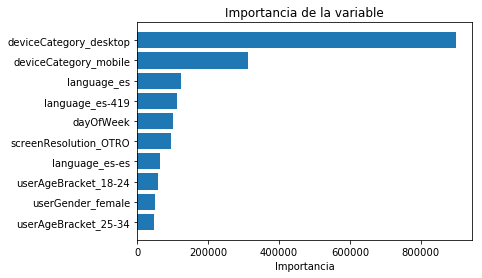

In [133]:
import matplotlib.pyplot as plt
n = 10

cols = list(map(lambda x: x[0],ixg))
vals = list(map(lambda x: x[1],ixg))

fig, ax = plt.subplots()
x = cols[:n] #list(reversed(cols[:n]))
y = vals[:n] #list(reversed(vals[:n]))
ax.barh(np.arange(len(x)), y)
ax.set_yticks(np.arange(len(x)))
ax.set_yticklabels(x)
ax.invert_yaxis()
ax.set_title('Importancia de la variable')
ax.set_xlabel('Importancia')
plt.show()

In [134]:
data_test['PRED'] = lgbm3.predict(data_test[features])
data_test[[target] + ['PRED'] + list(data_test.columns)]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,bounceRate,PRED,screenResolution,userGender,userAgeBracket,language,bounceRate,avgSessionDuration,avgTimeOnPage,sessions,...,browserSize_1900x970,browserSize_320x450,browserSize_320x460,browserSize_OTRO,city_La Victoria,city_Santiago de Surco,region_Cusco,region_Lima Region,country_Peru,PRED
29,83.823529,68.995671,OTRO,male,25-34,es-us,83.823529,72.794118,412.500000,68.0,...,0,0,0,0,0,0,0,0,1,68.995671
21,56.250000,45.983183,OTRO,male,35-44,es-419,56.250000,92.395833,53.433735,48.0,...,0,0,0,0,0,0,0,0,1,45.983183
258,31.250000,38.032761,OTRO,male,45-54,es-pe,31.250000,392.791667,88.046729,48.0,...,0,0,0,0,0,0,0,0,1,38.032761
269,40.007343,41.089773,OTRO,male,18-24,es,40.007343,246.750214,73.801369,8171.0,...,0,0,0,0,1,0,0,1,1,41.089773
373,54.400000,36.620458,OTRO,female,25-34,es,54.400000,202.064000,173.000000,125.0,...,0,0,0,1,0,0,0,0,1,36.620458
82,52.422907,49.995366,375x667,female,55-64,es-es,52.422907,110.985316,88.541716,681.0,...,0,0,0,0,0,0,0,0,1,49.995366
375,36.974790,39.099496,OTRO,male,55-64,es,36.974790,225.452101,83.686837,595.0,...,0,0,0,1,1,0,0,1,1,39.099496
3,82.857143,77.677311,OTRO,male,18-24,es-us,82.857143,48.635714,166.073171,140.0,...,0,0,0,0,0,0,0,0,1,77.677311
314,25.045704,33.197607,OTRO,female,25-34,es,25.045704,212.731261,98.868936,547.0,...,0,0,0,1,1,0,0,1,1,33.197607
145,54.458599,59.077641,320x570,female,45-54,es-419,54.458599,116.477707,120.701320,628.0,...,0,0,0,1,1,0,0,1,1,59.077641


In [200]:
descrip_colmuns(data_test)

,dtype,Tipo,N_Nulls,N_Unicos,V1,V2,V3,V4,V5,V6,count,mean,std,min,25%,50%,75%,max
screenResolution,object,Categoria,0 (0.0%),11,OTRO (75),640x360 (4),320x570 (4),1440x900 (3),1280x800 (3),375x667 (3),,,,,,,,
userGender,object,Categoria,0 (0.0%),2,male (54),female (45),,,,,,,,,,,,
userAgeBracket,object,Categoria,0 (0.0%),6,25-34 (30),35-44 (17),55-64 (16),18-24 (15),45-54 (14),65+ (7),,,,,,,,
language,object,Categoria,0 (0.0%),5,es (42),es-419 (26),es-pe (15),es-es (11),es-us (5),,,,,,,,,
bounceRate,float64,Numero,0 (0.0%),95,33.33333333333333 (3),53.33333333333334 (2),77.7777777777778 (2),52.37020316027088 (1),62.114248194353245 (1),44.09937888198758 (1),99,47.7669,16.9459,15.7895,34.8791,43.8525,56.5341,89.4737
avgSessionDuration,float64,Numero,0 (0.0%),99,79.2703081232493 (1),157.86386554621848 (1),44.2962962962963 (1),7.166666666666668 (1),68.57345971563981 (1),99.21311475409836 (1),99,175.034,111.224,4.2807,95.0078,163.941,234.069,647.51
avgTimeOnPage,float64,Numero,0 (0.0%),99,75.08835523334844 (1),178.18577075098815 (1),84.96140350877192 (1),92.3559488692232 (1),52.17307692307693 (1),51.122448979591844 (1),99,89.5904,50.7362,13.3692,63.459,80.8218,98.2585,412.5
sessions,float64,Numero,0 (0.0%),76,54.0 (5),45.0 (3),48.0 (3),59.0 (2),62.0 (2),57.0 (2),99,990.909,3074.51,36,66.5,170,647,25365
ID,object,Categoria,0 (0.0%),99,375x667male45-54 (1),320x480female35-44 (1),1536x864male18-24 (1),1152x864male25-34 (1),480x801male25-34 (1),375x667female55-64 (1),,,,,,,,
year,int64,Numero,0 (0.0%),1,2017 (99),,,,,,99,2017,0,2017,2017,2017,2017,2017


In [149]:
def r2(actual, predict):
    sst = ((actual - actual.mean())**2).sum()
    sse = ((actual - predict)**2).sum()
    return(1 - sse/sst)

In [150]:
x1 = data_test['bounceRate']
x2 = data_test['PRED']

r2(x1,x2)

0.5819293650744607

In [199]:
import seaborn as sns

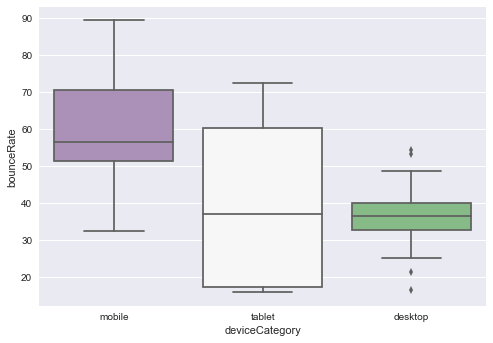

In [201]:
sns.boxplot(x="deviceCategory", y="bounceRate", data=data_test, palette="PRGn")
plt.show()

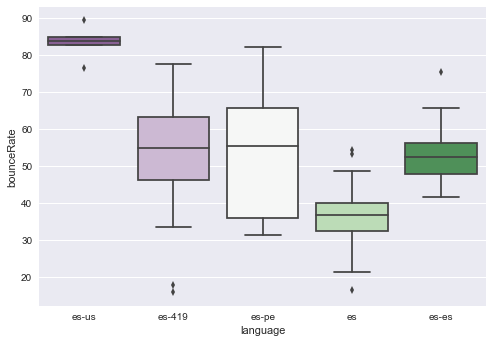

In [203]:
sns.boxplot(x="language", y="bounceRate", data=data_test, palette="PRGn")
plt.show()

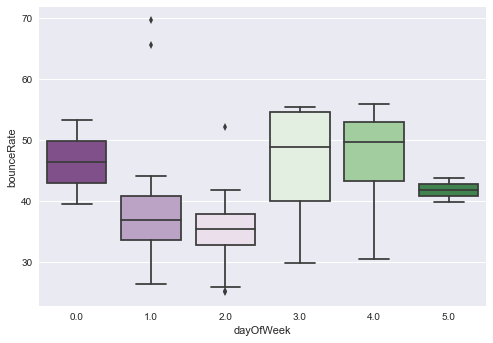

In [212]:
sns.boxplot(x="dayOfWeek", y="bounceRate", data=data_test, palette="PRGn")
plt.show()

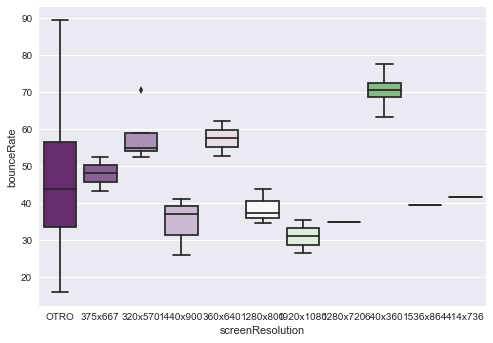

In [217]:
sns.boxplot(x="screenResolution", y="bounceRate", data=data_test, palette="PRGn")
plt.show()

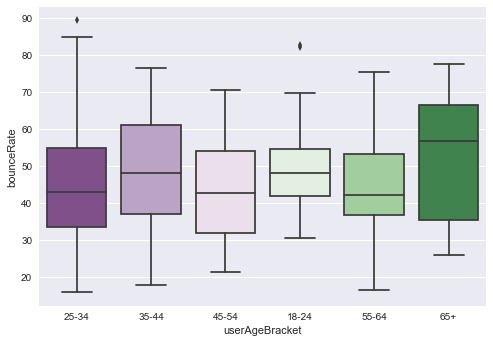

In [204]:
sns.boxplot(x="userAgeBracket", y="bounceRate", data=data_test, palette="PRGn")
plt.show()

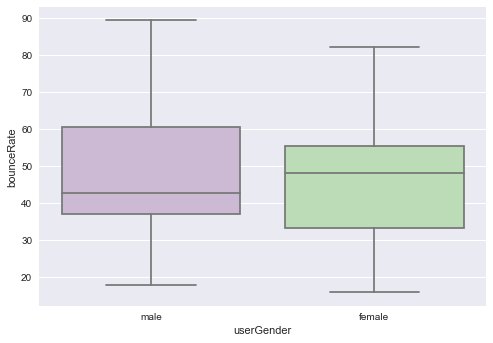

In [198]:
sns.boxplot(x="userGender", y="bounceRate", data=data_test, palette="PRGn")
plt.show()

In [17]:
from xgboost.sklearn import XGBClassifier

In [18]:
features = cols

from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size=0.25, random_state=27)

x=np.array(data_train[features])
y=np.array(data_train[target])#.ravel()

xt=np.array(data_test[features])
yt=np.array(data_test[target])#.ravel()
    
xg=XGBClassifier(n_estimators=2500, objective='l2', random_state =27, learning_rate= 0.015, \
                 colsample_bytree=0.9,max_depth= 10, subsample=0.9)
# bst = xgb.train(param, xg_train, num_round, watchlist)
# xg.fit(x,y,eval_set=[(x ,y),(xt,yt)], verbose=True,early_stopping_rounds=50)
xg.fit(x,y,eval_set=[(x ,y),(xt,yt)], eval_metric="auc", verbose=True,early_stopping_rounds=50)

ValueError: y contains new labels: [ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan]